In [2]:
# 라이브러리 
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pylab as plt

In [3]:
# 압축 해제 
import shutil
shutil.unpack_archive("data.zip", "")  

In [4]:
# 경로
train_path = "train/"
valid_path = "validation/"
print(train_path)
print(valid_path)

train/
validation/


In [5]:
# 이미지 데이터 제너레이터
image_gen = ImageDataGenerator(rescale=(1/255.))
image_gen

In [6]:
# flow_from_directory 함수로 폴더에서 이미지 가져옴
train_gen = image_gen.flow_from_directory(train_path, 
                                          batch_size=32, 
                                          target_size=(96, 96),   
                                          classes=['good','bad'], 
                                          class_mode = 'binary',
                                          seed=0)

valid_gen = image_gen.flow_from_directory(valid_path,                                          
                                          batch_size=32, 
                                          target_size=(96, 96),   
                                          classes=['good','bad'], 
                                          class_mode = 'binary',
                                          seed=0)

Found 695 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


In [7]:
batch = next(train_gen)
batch[0].shape

(32, 96, 96, 3)

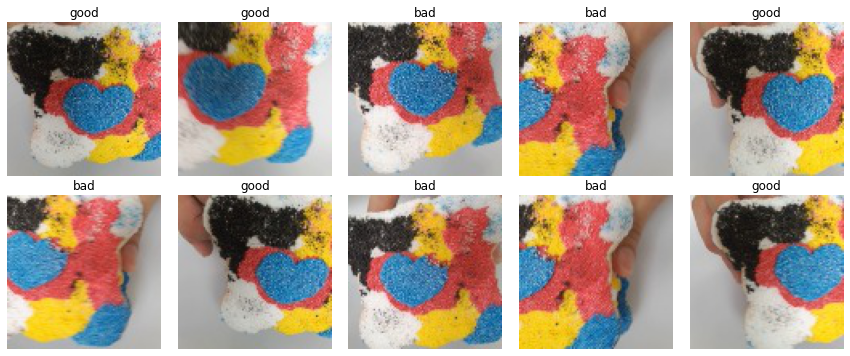

In [8]:
# 샘플 이미지 출력
class_labels = ['good','bad']
batch = next(train_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize=(12, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(int)])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [9]:
# 모델
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential([
                    tf.keras.layers.BatchNormalization(),
                    Conv2D(16, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
])

In [110]:
# 모델 컴파일
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_gen, validation_data=valid_gen, epochs=3)

Epoch 1/3
22/22 [==============================] - 7s 294ms/step - loss: 0.2701 - accuracy: 0.9281 - val_loss: 0.3587 - val_accuracy: 0.8033
Epoch 2/3
22/22 [==============================] - 6s 291ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0977 - val_accuracy: 0.9754
Epoch 3/3
22/22 [==============================] - 6s 287ms/step - loss: 4.1301e-04 - accuracy: 1.0000 - val_loss: 0.0505 - val_accuracy: 0.9918


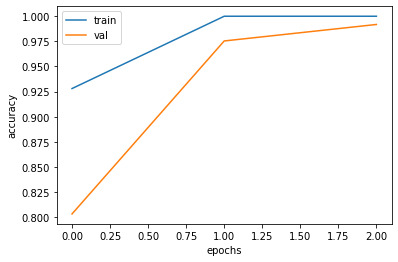

In [111]:
# 학습 정확도
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

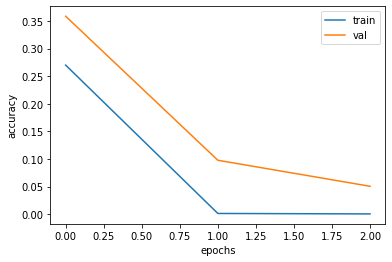

In [112]:
# loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()